In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import DistanceMetric
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

In [2]:
data_dir = "../data/"
image_dir = "../images/"

target_crop = "soybean"
years = 48 #years of data (1970-2017)

full_data = pd.read_csv(join(data_dir ,"ts_{}_{}yr_df.csv".format(target_crop, years)))

full_data.fips_code = full_data.fips_code.astype(str).apply(lambda x: x.zfill(5))
full_data.set_index('fips_code', inplace=True)
full_data.columns = full_data.columns.astype(int)
full_data.head()

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
fips_code                                                                     
01049      23.0  27.0  22.2  18.6  21.0  23.0  23.0  20.0  24.0  29.3  14.0   
01077      22.0  29.0  24.4  19.7  20.0  26.5  22.0  18.0  17.9  24.5  14.0   
01083      22.0  29.0  22.5  24.0  22.0  30.0  26.0  19.9  21.0  27.2  17.9   
01089      21.0  24.0  19.7  18.3  20.0  24.0  22.0  21.0  22.0  26.3  14.0   
05001      26.0  29.0  25.0  29.0  27.0  31.0  27.2  27.6  28.0  31.0  19.0   

           1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
fips_code                                                                     
01049      23.9  23.4  17.1  22.5  29.0  18.0  17.0  25.0  26.8  21.9  22.0   
01077      22.8  27.6  18.6  15.7  32.2  21.8  16.5  17.7  21.0  13.6  25.0   
01083      25.5  29.2  15.5  21.0  32.5  25.0  13.0  23.1  23.2  15.7  26.5   
01089      23.3  28.3  14.7  22.5  29.8  29.0  17.0  24.2  22.3  22.0  28.2   
05001      30.0  29.0  26.0  28.0  30.0  30.0  30.0  32.0  28.0  33.0  34.1   

           1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  \
fips_code                                                                     
01049      32.8  24.7  37.1  25.0  36.0  26.0  20.0  15.0  25.0  38.0  19.0   
01077      30.5  23.9  27.2  27.0  36.0  27.0  27.0   6.0   9.0  38.0  25.0   
01083      29.9  28.2  32.6  24.0  36.0  30.0  22.0   8.0  17.0  35.0  25.0   
01089      31.0  25.6  36.3  24.0  37.0  27.0  22.0  12.0  20.0  34.0  23.0   
05001      35.0  32.2  38.6  33.0  37.0  38.7  30.4  41.0  35.0  40.0  42.0   

           2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
fips_code                                                                     
01049      39.0  39.0  40.0  20.0  17.0  25.5  38.0  23.3  30.0  47.0  47.9   
01077      37.0  31.0  28.0  24.0  18.0  26.5  39.5  24.5  31.0  46.4  40.1   
01083      39.0  40.0  31.0  16.0  18.0  34.0  44.5  26.0  38.0  48.4  45.0   
01089      36.0  35.0  31.0  16.0  21.0  38.5  42.0  22.6  34.5  46.3  43.6   
05001      45.0  46.0  41.0  46.0  46.0  42.0  45.0  43.2  44.3  50.7  51.8   

           2014  2015  2016  2017  
fips_code                          
01049      44.3  45.6  29.2  46.1  
01077      37.5  46.5  29.9  46.3  
01083      37.8  47.4  31.8  50.3  
01089      42.7  45.8  37.6  42.4  
05001      55.1  53.9  54.4  53.7

# Linear Regression

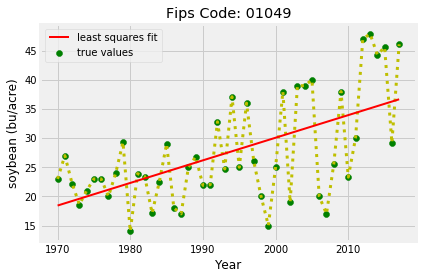

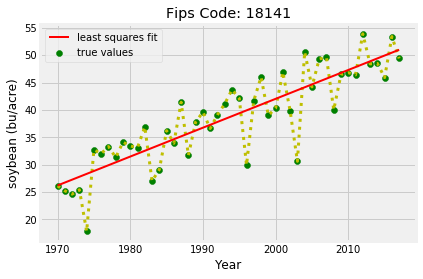

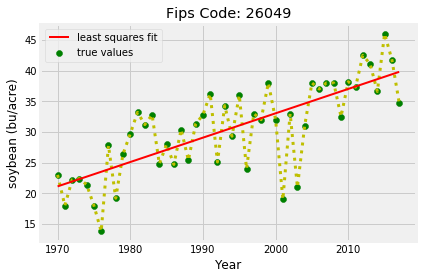

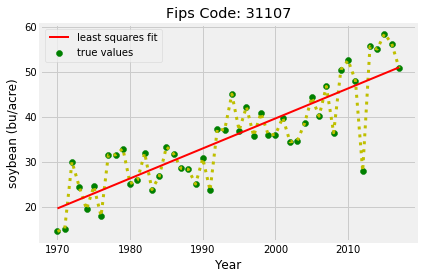

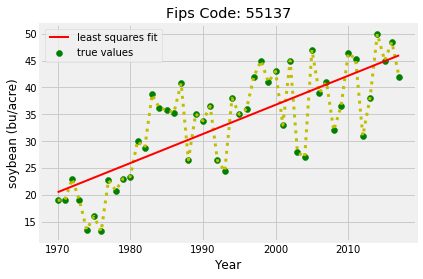

In [3]:
# Choose 5 Counties from dataset to fit a linear model  
counties = full_data.shape[0]
X = np.array(full_data.columns).reshape(-1,1) #years

for i in range(0, counties, counties//4):
    y = full_data.iloc[i].values
    lm = LinearRegression()
    lm.fit(X, y)
    preds = lm.predict(X)
    plt.scatter(X, y, c='g', label='true values')
    plt.plot(X, y, 'y:', linewidth=3) 
    plt.plot(X, preds, 'r', linewidth=2, label='least squares fit')
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("{} (bu/acre)".format(target_crop))
    plt.title("Fips Code: {}".format(full_data.iloc[i].name))
    plt.show();
plt.close('all')

# Randomly create an array of years to remove from complete dataset

In [4]:
pop_list = np.random.randint(X.min(), X.max()+1, counties)
pop_list[:5]

array([1994, 1975, 1991, 2003, 1989])

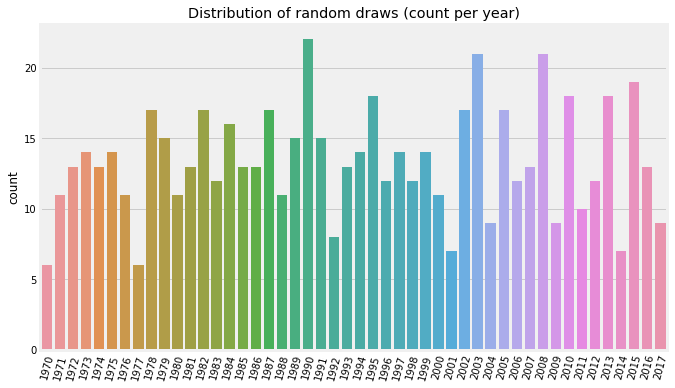

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
plt.title("Distribution of random draws (count per year)")
sns.countplot(pop_list);

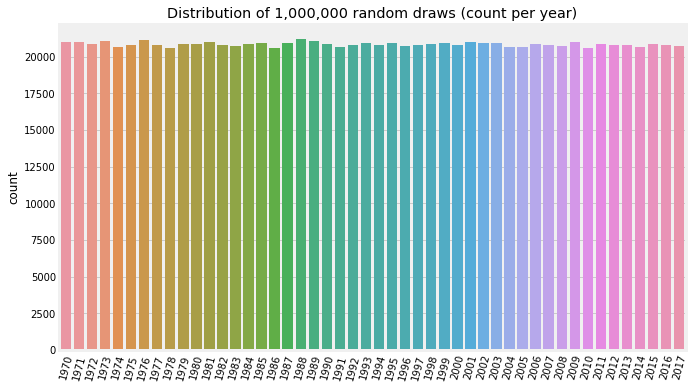

In [6]:
test_1000000 = np.random.randint(X.min(), X.max()+1, 1000000)
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
plt.title("Distribution of 1,000,000 random draws (count per year)")
sns.countplot(test_1000000);

# Keep track of all the removed data 

In [7]:
true = [full_data.iloc[i][yr] for i, yr in enumerate(pop_list)]
true[:5]

[37.1, 26.5, 26.5, 36.0, 28.0]

In [8]:
full_test = full_data.copy() # make a copy before removing data
for i, yr in enumerate(pop_list):
    full_test.iloc[i][yr] = np.nan 

In [9]:
print(pop_list[:5])
full_test.head()

[1994 1975 1991 2003 1989]


1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
fips_code                                                                     
01049      23.0  27.0  22.2  18.6  21.0  23.0  23.0  20.0  24.0  29.3  14.0   
01077      22.0  29.0  24.4  19.7  20.0   NaN  22.0  18.0  17.9  24.5  14.0   
01083      22.0  29.0  22.5  24.0  22.0  30.0  26.0  19.9  21.0  27.2  17.9   
01089      21.0  24.0  19.7  18.3  20.0  24.0  22.0  21.0  22.0  26.3  14.0   
05001      26.0  29.0  25.0  29.0  27.0  31.0  27.2  27.6  28.0  31.0  19.0   

           1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
fips_code                                                                     
01049      23.9  23.4  17.1  22.5  29.0  18.0  17.0  25.0  26.8  21.9  22.0   
01077      22.8  27.6  18.6  15.7  32.2  21.8  16.5  17.7  21.0  13.6  25.0   
01083      25.5  29.2  15.5  21.0  32.5  25.0  13.0  23.1  23.2  15.7   NaN   
01089      23.3  28.3  14.7  22.5  29.8  29.0  17.0  24.2  22.3  22.0  28.2   
05001      30.0  29.0  26.0  28.0  30.0  30.0  30.0  32.0   NaN  33.0  34.1   

           1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  \
fips_code                                                                     
01049      32.8  24.7   NaN  25.0  36.0  26.0  20.0  15.0  25.0  38.0  19.0   
01077      30.5  23.9  27.2  27.0  36.0  27.0  27.0   6.0   9.0  38.0  25.0   
01083      29.9  28.2  32.6  24.0  36.0  30.0  22.0   8.0  17.0  35.0  25.0   
01089      31.0  25.6  36.3  24.0  37.0  27.0  22.0  12.0  20.0  34.0  23.0   
05001      35.0  32.2  38.6  33.0  37.0  38.7  30.4  41.0  35.0  40.0  42.0   

           2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
fips_code                                                                     
01049      39.0  39.0  40.0  20.0  17.0  25.5  38.0  23.3  30.0  47.0  47.9   
01077      37.0  31.0  28.0  24.0  18.0  26.5  39.5  24.5  31.0  46.4  40.1   
01083      39.0  40.0  31.0  16.0  18.0  34.0  44.5  26.0  38.0  48.4  45.0   
01089       NaN  35.0  31.0  16.0  21.0  38.5  42.0  22.6  34.5  46.3  43.6   
05001      45.0  46.0  41.0  46.0  46.0  42.0  45.0  43.2  44.3  50.7  51.8   

           2014  2015  2016  2017  
fips_code                          
01049      44.3  45.6  29.2  46.1  
01077      37.5  46.5  29.9  46.3  
01083      37.8  47.4  31.8  50.3  
01089      42.7  45.8  37.6  42.4  
05001      55.1  53.9  54.4  53.7

### Save test set with missing values to try additional imputation techniques

In [10]:
full_test.to_csv(join(data_dir,"{}_test_df.csv".format(target_crop))) 

# Linear Regression for one missing `Year ` value


    For Random Year: 1994 & Fips Code: 01049
    True: 37.10
    Predicted: 27.54
    Residual: -9.56


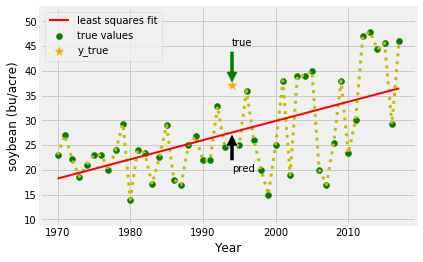


    For Random Year: 1982 & Fips Code: 17173
    True: 37.50
    Predicted: 34.79
    Residual: -2.71


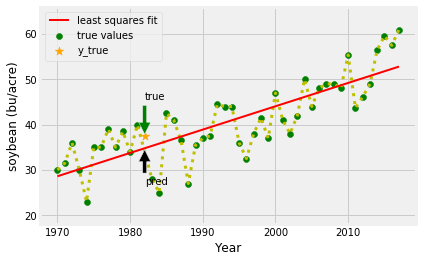


    For Random Year: 2016 & Fips Code: 19057
    True: 60.40
    Predicted: 52.44
    Residual: -7.96


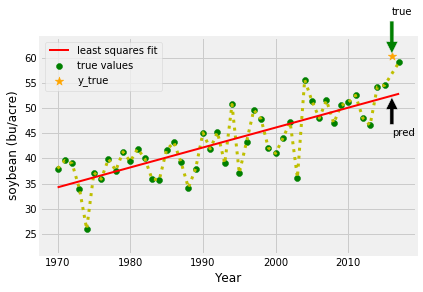


    For Random Year: 2008 & Fips Code: 22017
    True: 29.00
    Predicted: 34.34
    Residual: 5.34


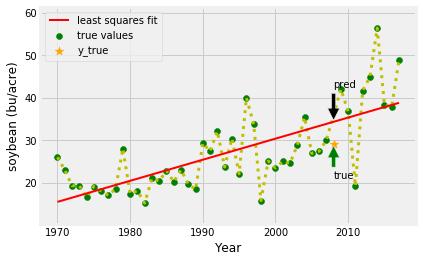


    For Random Year: 1985 & Fips Code: 28009
    True: 28.50
    Predicted: 23.13
    Residual: -5.37


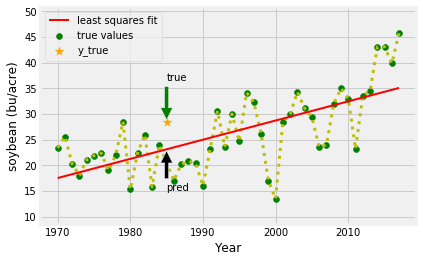


    For Random Year: 2008 & Fips Code: 38017
    True: 32.50
    Predicted: 34.75
    Residual: 2.25


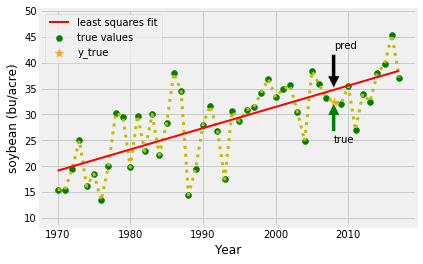


    For Random Year: 1984 & Fips Code: 51133
    True: 27.00
    Predicted: 25.87
    Residual: -1.13


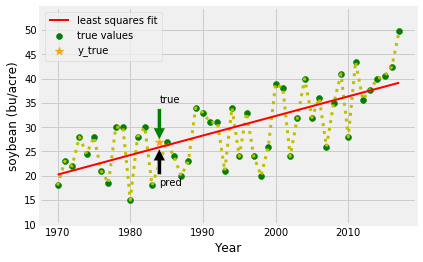

In [11]:
test_pred, test_true = [], []
X_full = X.copy() # used to predict for all years

for i in range(0, counties, 100):
    X_ = full_data.columns.tolist() # years (1970 - 2017)
    X_.remove(pop_list[i]) # remove the randomly chosen year
    X_miss = np.array(X_).reshape(-1,1) # Final X to use for predictions
    y = full_test.iloc[i].dropna().values 
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    preds = lm.predict(X_full)
    pred_val = preds[pop_list[i]-1970] # idx for the predicition of missing val
    pred_yr = pop_list[i] # year of missing data point
    
    test_pred.append(pred_val) # store values 
    test_true.append(true[i]) # for testing sample accuracy
    
    print("""
    For Random Year: {} & Fips Code: {}
    True: {:.2f}
    Predicted: {:.2f}
    Residual: {:.2f}""".format(pred_yr, full_test.iloc[i].name, 
                               true[i], pred_val, pred_val-true[i]))
    
    if pred_val > true[i]: # set bounds for plotting points
        dist = 8
    else:
        dist = -8
    plt.ylim(min(true[i], min(y))-5, max(y)+5) # set bounds for y-axis to capture extreme true values
    plt.annotate('pred', xy=(pred_yr, pred_val), xytext=(pred_yr, pred_val+dist),
                arrowprops=dict(facecolor='k', shrink=0.05))
    plt.annotate('true', xy=(pred_yr, true[i]), xytext=(pred_yr, true[i]-dist),
                arrowprops=dict(facecolor='g', shrink=0.05))
    
    plt.scatter(X_miss, y, c='g', label='true values') # minus missing val
    plt.scatter(pred_yr, true[i], s=80, c='orange', marker='*', label='y_true') # missing true val
    plt.plot(X_miss, y, 'y:', linewidth=3) 
    plt.plot(X_full, preds, 'r', linewidth=2, label='least squares fit')
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("{} (bu/acre)".format(target_crop))
    plt.show();
plt.close('all')

### Mean Absolute Percentage Error (MAPE)
- Metric commonly used in time series forecasting
- Average percentage of errors in the predictions
    - Disregards the direction (above or below the true value).

In [12]:
def mape(y_pred, y_true):
    y_pred = np.asarray(y_pred)
    y_true = np.asarray(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
"Mean Absolute Percentage Error: {:.2f}%".format(mape(test_pred, test_true))

'Mean Absolute Percentage Error: 13.50%'

# LR predictions for all missing values

In [14]:
y_pred = []
for i in range(counties):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.iloc[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    preds = lm.predict(X_full) # Using X_full from above
    y_pred.append(preds[pop_list[i]-1970])

# Fill Methods 
### Foward Fill 
- and Back Fill if the missing data point is the first year in the series

### Mean Value imputation 
- For Each County (Average of remaining Years) 
- For Each Year (Average of all remaining Counties) 


In [15]:
# fill in 1 missing value with the value of the previous year for that specific county
ffill_df = full_test.copy()
ffill_df.fillna(method='ffill', axis=1, inplace=True)
# unless it is the first year in the series, then backfill the value from the second year
ffill_df.fillna(method='bfill', axis=1, inplace=True)

ffill_preds = [ffill_df.iloc[i][pop_list[i]] for i in range(counties)]

# fill in the 1 missing values with the mean of all years for that specific county
yr_mean_df = full_test.copy()
yr_mean_df = yr_mean_df.apply(lambda county: county.fillna(county.mean()), axis=1)

yr_mean_preds = [yr_mean_df.iloc[i][pop_list[i]] for i in range(counties)]

# NOTE: we have to be careful with the interpretation of this method vs other methods. 
# fill in missing values (random number per year) with the mean of each year 
county_mean_df = full_test.copy()
county_mean_df.fillna(county_mean_df.mean(), inplace=True)

county_mean_preds = [county_mean_df.iloc[i][pop_list[i]] for i in range(counties)]

___

# Spatial Methods 
- First, get Latitude and Longitudes for all counties that grew Soybeans.
    - Data from US Census populated with [Generate County Centroids script](../maps/generate_county_centroids.py)

In [16]:
centroids_df = pd.read_csv(join(data_dir, "county_centroids.csv"), index_col=0)
centroids_df.fips_code = centroids_df.fips_code.astype(str).apply(lambda x: x.zfill(5))
centroids_df.set_index('fips_code', inplace=True)
full_data_centroids = full_data.join(centroids_df)
full_data_centroids.to_csv(join(data_dir, "{}_full_centroids.csv".format(target_crop)))
full_spatial = full_data_centroids[['latitude', 'longitude']]
full_spatial.head()

latitude  longitude
fips_code                      
01049      34.459800 -85.804109
01077      34.901407 -87.654010
01083      34.810099 -86.981401
01089      34.763090 -86.550226
05001      34.290809 -91.374911

# K Nearest Neighbors

In [17]:
%run spatial_lookup.py

<Figure size 432x288 with 0 Axes>

In [18]:
k_n = K_Spatial_Neighbors(full_spatial.values)
assert np.all(np.radians(full_spatial.iloc[0]) == k_n.coordinates[0])
k_n.coordinates[0]

array([ 0.60143696, -1.49756422])

### 5 Nearest Neighbors

In [19]:
neigh_table = k_n.build_neighbors_table(k=5, ret_dist=True)
neigh_table[:5]

[array([  3, 579,   2, 576, 581]),
 array([586,   2, 581, 399, 417]),
 array([  3, 581, 586,   1, 579]),
 array([  2, 579, 581,   0, 576]),
 array([22, 19, 23, 16, 11])]

In [20]:
k_n.srt_dist[:5]

[array([47.32075951, 50.74056303, 71.16942229, 72.85206421, 86.61569106]),
 array([26.27021234, 38.65342289, 40.72399456, 52.51269881, 52.90953676]),
 array([24.68169536, 27.2558526 , 36.62123205, 38.65342289, 55.69479334]),
 array([24.68169536, 37.49802384, 40.89906728, 47.32075951, 56.99752478]),
 array([28.45913412, 30.83504153, 31.51482548, 31.81362742, 32.36077477])]

In [21]:
kN5_preds = []
kN5_weighted_preds = []

for i in range(counties):
    neighbors = []
    for j in neigh_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    kN5_preds.append(np.mean(neighbors))
    w = list(map(lambda x: x**-1, k_n.srt_dist[i]))
    kN5_weighted_preds.append(np.average(neighbors, weights=w))

kN5_preds[:5], kN5_weighted_preds[:5]

([36.78, 25.22, 27.04, 41.0, 22.4],
 [36.80378108002226,
  25.78472025500918,
  27.605381293217505,
  40.7343426635471,
  22.432625757733454])

In [22]:
w_ = list(map(lambda x: x**-1, k_n.srt_dist[-1]))
assert np.average(neighbors, weights=w_) == kN5_weighted_preds[-1]
list(zip(k_n.srt_dist[-1], w_))

[(33.60489577222411, 0.029757568860741504),
 (36.15280136693387, 0.027660373807563955),
 (38.86383329720542, 0.025730863766130527),
 (45.32445675478395, 0.02206314364472666),
 (46.03946505248119, 0.021720495641295627)]

### N Neighbors within 100 miles 

In [23]:
radius_table = k_n.build_radius_table(radius=100)
radius_table[:5]

[array([  3, 579,   2, 576, 581, 574]),
 array([586,   2, 581, 399, 417,   3, 409, 582, 424, 413, 575, 400, 579,
        416, 589, 576]),
 array([  3, 581, 586,   1, 579, 576,   0, 589, 574, 417, 399]),
 array([  2, 579, 581,   0, 576, 586,   1, 589, 574]),
 array([ 22,  19,  23,  16,  11,  25,  20, 403, 401,  18,  12,  27, 418,
        423,  29, 420,  28,   6, 421, 425,  10,   5, 410, 415, 422,   9,
        404,  15, 407,  24])]

In [24]:
list(map(len, radius_table[:5])) # Large variation between Number of Neighbors

[6, 16, 11, 9, 30]

In [25]:
r_neighbors = [len(i) for i in radius_table]
uniq, cnts = np.unique(r_neighbors, return_counts=True)
uniq, cnts

(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67]),
 array([ 3,  2,  1,  2,  1,  6,  6,  5, 10,  8,  7, 12,  2, 11,  9,  9,  8,
         8, 11,  8, 14, 16, 12, 10, 15, 16,  9,  8, 10, 10, 11, 17, 13, 14,
        11, 14, 18, 19, 14, 17, 20, 23, 14, 15, 17, 12, 12, 16, 23, 16, 10,
         9, 14,  7,  7,  6,  6,  1,  3,  4,  1,  1,  2,  2,  4,  1]))

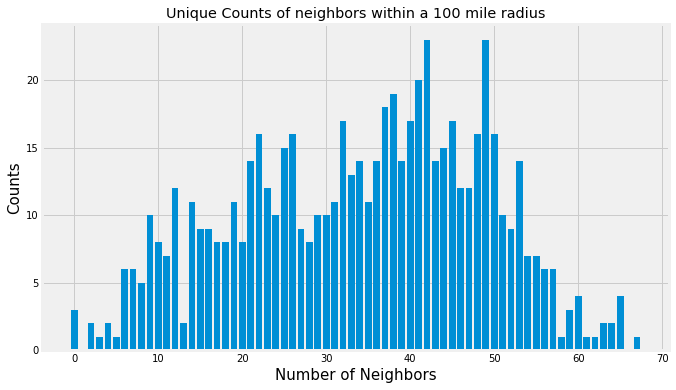

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(uniq, cnts)
plt.title("Unique Counts of neighbors within a 100 mile radius")
plt.ylabel("Counts", fontsize=15)
plt.xlabel("Number of Neighbors", fontsize=15);

### 3 Counties that do Not have a neighbor within 100 miles 

In [27]:
equals_0 = [i for i, n in enumerate(r_neighbors) if n==0]
fips_greater_than_100 = full_data.iloc[equals_0].index
fips_greater_than_100

Index(['13027', '13033', '22017'], dtype='object', name='fips_code')

# Nearest Neighbor [kN1]

In [28]:
kN1_preds = []
for i in range(counties):
    n = full_data.iloc[neigh_table[i][0]][pop_list[i]]
    kN1_preds.append(n)
    
kN1_preds[:5]

[36.3, 27.0, 28.2, 39.0, 23.0]

### To assure each county has a neighbor, we need to expand the radius to 180 miles

In [29]:
distances = K_Spatial_Neighbors(full_spatial.values)
distances.build_neighbors_table(k=counties-1, ret_dist=True)
max(map(min, distances.srt_dist))

179.10387780004697

### Two options
- 1) Expand the radius 
- 2) For the 3 counties that are outside the 100 mile radius, use the nearest neighbor

In [30]:
# equals_0 = [i for i, n in enumerate(r_neighbors) if n==0]

kRad_preds = []
for i in range(counties):
    neighbors = []
    for j in radius_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    if neighbors:
        kRad_preds.append(np.mean(neighbors))
    else: # If no neighbor within 100 miles, use the nearest neighbor
        kRad_preds.append(kN1_preds[equals_0.pop(0)])

len(kRad_preds)

643

# Inverse Distance Weighting (IDW) Interpolation
- Dot product of Distance 
    - Euclidean --> "As the crow flies" in 2 dimensions
    - Haversine --> No, naysayers, the world is not flat

# Euclidean Distance

In [31]:
dist = DistanceMetric.get_metric("euclidean")

euc_dist_df = pd.DataFrame(dist.pairwise(full_spatial))
euc_dist_df.head()

0         1         2         3         4         5         6    \
0  0.000000  1.901880  1.228302  0.805404  5.573364  6.097767  5.617911   
1  1.901880  0.000000  0.678778  1.112417  3.770668  4.455720  3.989983   
2  1.228302  0.678778  0.000000  0.433730  4.424092  5.053385  4.580264   
3  0.805404  1.112417  0.433730  0.000000  4.847745  5.449838  4.974016   
4  5.573364  3.770668  4.424092  4.847745  0.000000  1.167902  1.026792   

        7         8         9         10        11        12        13   \
0  4.992601  5.019581  4.566432  5.036952  5.485767  5.979569  5.035571   
1  3.128709  3.120440  2.672466  3.142045  3.755088  4.272411  3.149268   
2  3.772929  3.791407  3.351136  3.820799  4.382821  4.893290  3.809007   
3  4.187216  4.219913  3.784846  4.254460  4.794775  5.301319  4.231395   
4  2.287435  1.709451  1.406288  1.172296  0.473236  0.781663  2.000697   

        14        15        16        17        18        19        20   \
0  5.906359  5.529131  6.130380  5.533767  4.988364  5.950463  6.091676   
1  4.004819  3.628289  4.324031  3.636344  3.130463  4.187113  4.237209   
2  4.681902  4.306084  4.979621  4.305465  3.800856  4.827820  4.907580   
3  5.113965  4.738686  5.403942  4.732725  4.231954  5.245343  5.338445   
4  1.463783  1.318255  0.557038  1.770817  0.768977  0.489486  0.691914   

        21        22        23        24        25        26        27   \
0  4.445649  5.404185  5.044047  4.984999  5.760569  5.552175  4.975505   
1  2.550432  3.556918  3.228905  3.083241  3.899431  3.668188  3.096089   
2  3.217409  4.224564  3.885466  3.760010  4.571424  4.326393  3.772304   
3  3.644083  4.654449  4.310856  4.191949  5.003002  4.747538  4.205501   
4  1.978398  0.423123  0.544483  1.467469  0.567581  2.079837  0.963325   

        28        29         30        31        32        33        34   \
0  5.994591  5.487261  11.229390  4.246693  4.052254  7.716965  8.422982   
1  4.106903  3.600343  12.827166  5.751078  5.945113  6.193944  7.513202   
2  4.784999  4.278234  12.214159  5.226295  5.278673  6.671525  7.735456   
3  5.218683  4.711882  11.821168  4.918960  4.857277  6.986572  7.894313   
4  1.034169  0.905166  16.571386  8.523616  9.454322  5.700110  8.427773   

        35        36        37        38        39        40        41   \
0  7.398483  7.880120  8.657621  7.081290  6.164590  6.158757  5.065207   
1  5.932549  6.767566  7.521306  5.696719  5.266977  4.919897  3.942434   
2  6.383199  7.068948  7.836278  6.109689  5.467344  5.262880  4.222783   
3  6.683402  7.278375  8.051355  6.388923  5.624167  5.505553  4.437557   
4  5.705307  7.349023  7.910151  5.793530  6.655766  5.658182  5.314433   

        42        43        44        45        46        47        48   \
0  5.503394  5.608352  4.945933  5.394855  8.003680  5.832350  5.568189   
1  4.105463  4.653631  4.102679  4.411025  7.080683  4.900541  4.778022   
2  4.513442  4.870760  4.264243  4.637330  7.305845  5.111053  4.928064   
3  4.798050  5.042315  4.408762  4.816442  7.468074  5.276656  5.058722   
4  4.736734  6.106496  5.939055  5.886561  8.036506  6.323421  6.496130   

        49     ...            593        594        595        596        597  \
0  5.377760    ...       8.339647   9.178609   9.513418   9.067776   7.244661   
1  4.262385    ...       9.979405  10.770482  11.126480  10.566060   8.914760   
2  4.543895    ...       9.352807  10.157242  10.507976   9.977970   8.279346   
3  4.756229    ...       8.951810   9.764828  10.111920   9.602491   7.872880   
4  5.522643    ...      13.740466  14.516918  14.878767  14.276120  12.682354   

         598        599        600        601        602        603  \
0   9.486169  10.337350   9.990896   6.828354   9.722742   8.959294   
1  11.121477  12.027465  11.624467   8.477175  11.342668  10.523416   
2  10.497124  11.389638  11.000985   7.846432  10.722545   9.917317   
3  10.097198  10.980628  10.601472   7.443345  10.325342   9.529787   
4  

In [32]:
euc_idw1 = euc_dist_df.copy()
euc_idw1 = euc_idw1.applymap(lambda x: x**-1 if x != 0 else 0) # inverse weight
euc_idw1 = euc_idw1.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
ones = np.ones(counties)
norms_euc = [sum(euc_idw1.iloc[i]) for i in euc_idw1.columns.values]
assert(np.allclose(ones, norms_euc))

euc_vals = np.array(euc_idw1).dot(np.array(full_data))

euc_preds = [euc_vals[i][pop_list[i]-1970] for i in range(counties)]

# Haversine Distance

In [33]:
full_hav_df = full_spatial.copy()
full_hav_df = np.radians(full_hav_df)
# full_hav_df.latitude = full_hav_df.latitude.apply(lambda x : x*np.pi/180)
# full_hav_df.longitude = full_hav_df.longitude.apply(lambda x : x*np.pi/180)

dist = DistanceMetric.get_metric("haversine")
hav_dist_df = pd.DataFrame(dist.pairwise(full_hav_df))

hav_dist_df.head()

0         1         2         3         4         5         6    \
0  0.000000  0.027646  0.017978  0.011953  0.080293  0.089251  0.082228   
1  0.027646  0.000000  0.009764  0.015996  0.054507  0.066560  0.059843   
2  0.017978  0.009764  0.000000  0.006235  0.063798  0.074796  0.067929   
3  0.011953  0.015996  0.006235  0.000000  0.069855  0.080341  0.073416   
4  0.080293  0.054507  0.063798  0.069855  0.000000  0.020023  0.017904   

        7         8         9         10        11        12        13   \
0  0.073580  0.072939  0.065835  0.072592  0.079466  0.086899  0.073648   
1  0.046817  0.045391  0.038305  0.045039  0.055108  0.062966  0.046407   
2  0.055834  0.054961  0.048069  0.054803  0.063897  0.071635  0.055737   
3  0.061633  0.061063  0.054300  0.061032  0.069728  0.077397  0.061704   
4  0.038736  0.028893  0.022134  0.019557  0.008174  0.013222  0.033940   

        14        15        16        17        18        19        20   \
0  0.085299  0.079829  0.088327  0.080451  0.071711  0.086016  0.087543   
1  0.057653  0.052186  0.062442  0.052957  0.044857  0.060987  0.060719   
2  0.067360  0.061915  0.071784  0.062480  0.054474  0.070037  0.070345   
3  0.073542  0.068112  0.077858  0.068550  0.060668  0.075980  0.076539   
4  0.025473  0.022952  0.008036  0.030789  0.012072  0.007789  0.010955   

        21        22        23        24        25        26        27   \
0  0.064801  0.077689  0.072594  0.072115  0.082784  0.081231  0.071570   
1  0.037342  0.051029  0.046587  0.044469  0.055842  0.054057  0.044300   
2  0.046832  0.060596  0.055932  0.054174  0.065495  0.063346  0.054026   
3  0.052897  0.066770  0.062019  0.060356  0.071701  0.069281  0.060255   
4  0.031893  0.007189  0.007961  0.024604  0.009748  0.036130  0.015618   

        28        29        30        31        32        33        34   \
0  0.086205  0.078942  0.163229  0.071093  0.060338  0.122046  0.143292   
1  0.058763  0.051522  0.183375  0.092640  0.087877  0.101367  0.130506   
2  0.068522  0.061278  0.175340  0.085337  0.078301  0.107529  0.133503   
3  0.074757  0.067513  0.170166  0.081118  0.072270  0.111559  0.135531   
4  0.017669  0.015744  0.236566  0.129437  0.137781  0.099466  0.144459   

        35        36        37        38        39        40        41   \
0  0.118057  0.131565  0.144310  0.114307  0.104556  0.101088  0.083857   
1  0.098177  0.116365  0.128899  0.095531  0.091743  0.084136  0.068249   
2  0.103976  0.120271  0.132938  0.100839  0.094540  0.088596  0.071992   
3  0.107799  0.122896  0.135614  0.104378  0.096582  0.091676  0.074747   
4  0.099358  0.126722  0.137174  0.100413  0.111201  0.096266  0.087768   

        42        43        44        45        46        47        48   \
0  0.088371  0.094523  0.083868  0.090626  0.135951  0.098558  0.095005   
1  0.069228  0.080999  0.071597  0.076739  0.122984  0.085322  0.083387   
2  0.074536  0.083996  0.073976  0.079845  0.126022  0.088239  0.085630   
3  0.078192  0.086219  0.075895  0.082161  0.128095  0.090389  0.087382   
4  0.080149  0.101307  0.096550  0.097360  0.137411  0.105236  0.106758   

        49     ...          593       594       595       596       597  \
0  0.089223    ...     0.121472  0.134264  0.138630  0.134548  0.105400   
1  0.073740    ...     0.142830  0.154507  0.159292  0.152868  0.127520   
2  0.077487    ...     0.134400  0.146402  0.151079  0.145304  0.118862   
3  0.080205    ...     0.128993  0.141201  0.145803  0.140462  0.113314   
4  0.091899    ...     0.196746  0.207901  0.212851  0.205250  0.181733   

        598       599       600       601       602       603       604  \
0  0.137844  0.149002  0.145028  0.099758  0.141475  0.131665  0.134215   
1  0.158990  0.171285  0.166085  0.121457  0.162263  0.151349  0.156551   
2  0.150644  0.162647  0.157773  0.112895  0.154020  0.143395  0.147882   
3  0.145281  0.157088  0.152429  0.107416  0.148722  0.138295  0.142310   
4  0.212758  0.225426  0.

In [34]:
hav_idw1 = hav_dist_df.copy()
hav_idw1 = hav_idw1.applymap(lambda x: x**-1 if x != 0 else 0) # inverse weight
hav_idw1 = hav_idw1.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
hav_norms = [sum(hav_idw1.iloc[i]) for i in hav_idw1.columns.values]
assert(np.allclose(ones, hav_norms))

hav_vals = np.array(hav_idw1).dot(np.array(full_data))

hav_preds = [hav_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

# Exponential Smoothing ${1/x^2}$

In [35]:
euc_idw2 = euc_dist_df.copy()
euc_idw2 = euc_idw2.applymap(lambda x: x**-2 if x != 0 else 0)
euc_idw2 = euc_idw2.apply(lambda x: x/sum(x), axis=1)
norms_euc_idw2 = [sum(euc_idw2.iloc[i]) for i in euc_idw2.columns.values]
assert(np.allclose(ones, norms_euc_idw2))

euc_idw2_vals = np.array(euc_idw2).dot(np.array(full_data))

euc_idw2_preds = [euc_idw2_vals[i][pop_list[i]-1970] for i in range(counties)]

In [36]:
hav_idw2 = hav_dist_df.copy()
hav_idw2 = hav_idw2.applymap(lambda x: x**-2 if x != 0 else 0)
hav_idw2 = hav_idw2.apply(lambda x: x/sum(x), axis=1)
norms_hav_idw2 = [sum(hav_idw2.iloc[i]) for i in hav_idw2.columns.values]
assert(np.allclose(ones, norms_hav_idw2))

hav_idw2_vals = np.array(hav_idw2).dot(np.array(full_data))

hav_idw2_preds = [hav_idw2_vals[i][pop_list[i]-1970] for i in range(counties)]

# Predictions
### Save the County & Year of the randomly chosen value for reproducibility

In [37]:
predictions = pd.DataFrame({"years":pop_list}, index=full_data.index)
predictions["y_true"] = true
predictions["lr_preds"] = y_pred
predictions["ffill_preds"] = ffill_preds
predictions["yr_mean_preds"] = yr_mean_preds
predictions["county_mean_preds"] = county_mean_preds
predictions["euc_idw1_preds"] = euc_preds
predictions["hav_idw1_preds"] = hav_preds
predictions["euc_idw2_preds"] = euc_idw2_preds
predictions["hav_idw2_preds"] = hav_idw2_preds
predictions["k1_Nearest_pred"] = kN1_preds
predictions["k5_Nearest_pred"] = kN5_preds
predictions["k5_Weighted_pred"] = kN5_weighted_preds
predictions["kRad_Mean_pred"] = kRad_preds
predictions.to_csv(join(data_dir, "{}_predicitions.csv".format(target_crop)))
predictions.head()

years  y_true   lr_preds  ffill_preds  yr_mean_preds  \
fips_code                                                         
01049       1994    37.1  27.540418         24.7      27.342553   
01077       1975    26.5  19.112774         20.0      26.102128   
01083       1991    26.5  27.129752         15.7      28.087234   
01089       2003    36.0  31.301652         23.0      27.329787   
05001       1989    28.0  33.888000         32.0      36.657447   

           county_mean_preds  euc_idw1_preds  hav_idw1_preds  euc_idw2_preds  \
fips_code                                                                      
01049              41.675040       40.516299       40.242988       38.672496   
01077              28.442607       27.882079       27.672295       26.353785   
01083              35.051911       33.225538       32.900598       29.885026   
01089              33.977492       35.715814       35.689299       38.519918   
05001              32.917994       28.819746       28.631772       23.960732   

           hav_idw2_preds  k1_Nearest_pred  k5_Nearest_pred  k5_Weighted_pred  \
fips_code                                                                       
01049           38.096123             36.3            36.78         36.803781   
01077           26.055317             27.0            25.22         25.784720   
01083           29.360571             28.2            27.04         27.605381   
01089           38.443699             39.0            41.00         40.734343   
05001           23.797392             23.0            22.40         22.432626   

           kRad_Mean_pred  
fips_code                  
01049           37.650000  
01077           23.112500  
01083           25.481818  
01089           41.222222  
05001           21.860000

# Prediction Accuracy Metrics

### Mean Absolute Percentage Error (MAPE)
- Introduced above
    
### Median Absolute Error (MAE)
- Median of the absolute values of the errors. (Robust to outliers)
- Quantifies the deviation from the real values in the original unit (bu/acre in this case).

### Root Mean Squared Error (RMSE)
- Commonly used metric to compare regression models  
    - Only applies to models fit on the same data
    
### R Squared (R2)
- The R-Squared statistic gives an indication of the portion of the model that is effective at explaining the dependent variable.
    - Perfect score of 1.0 
    - Low R-Squared --> independent variables do NOT do a good job at explaining the dependent (target) variable.  
    - High R-Squared --> independent variables do a good job at explaining the dependent (target) variable. 
    - Ex: R-Squared --> 0.65 --> 65% of the variations in yield returns are “explained” by the model, whereas the remaining 35% is “unexplained”).

In [38]:
pred_cols = [col for col in predictions.columns if "pred" in col]
MAPE, MAE, R2, RMSE = [], [], [], []

for col in pred_cols:
    MAPE.append(mape(predictions["y_true"], predictions[col]))
    MAE.append(median_absolute_error(predictions["y_true"], predictions[col]))
    R2.append(r2_score(predictions["y_true"], predictions[col]))
    RMSE.append(np.sqrt(mean_squared_error(predictions["y_true"], predictions[col])))
    
metric_df = pd.DataFrame({"MAPE": MAPE, "MAE":MAE, "RMSE":RMSE, "RSQUARED":R2}, 
                         index=[col.upper() for col in pred_cols])

metric_df.to_csv(join(data_dir,"{}_metrics.csv".format(target_crop)))
metric_df

MAPE       MAE      RMSE  RSQUARED
LR_PREDS           12.717789  3.691601  5.653820  0.700357
FFILL_PREDS        17.915291  4.200000  7.498800  0.472888
YR_MEAN_PREDS      19.316394  5.910638  8.590884  0.308176
COUNTY_MEAN_PREDS  17.917507  5.866981  7.945045  0.408285
EUC_IDW1_PREDS     14.011552  4.379573  6.420803  0.613545
HAV_IDW1_PREDS     13.822370  4.280468  6.358312  0.621031
EUC_IDW2_PREDS      9.249546  2.650806  4.285224  0.827866
HAV_IDW2_PREDS      9.095557  2.569139  4.217454  0.833267
K1_NEAREST_PRED     8.924507  2.300000  4.013614  0.848995
K5_NEAREST_PRED     6.928398  1.760000  3.126954  0.908344
K5_WEIGHTED_PRED    6.818563  1.727738  3.041523  0.913283
KRAD_MEAN_PRED      8.827925  2.406522  3.938680  0.854581

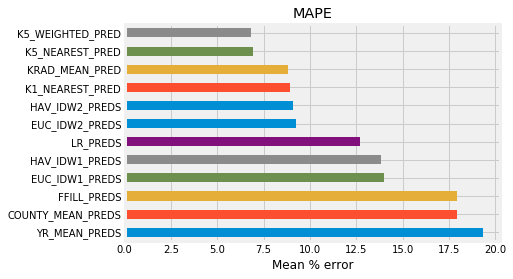

In [39]:
metric_df['MAPE'].sort_values(ascending=False).plot(kind="barh", title=col)
plt.xlabel("Mean % error")
plt.title('MAPE')
plt.show();

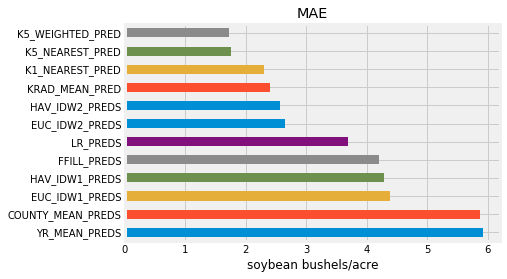

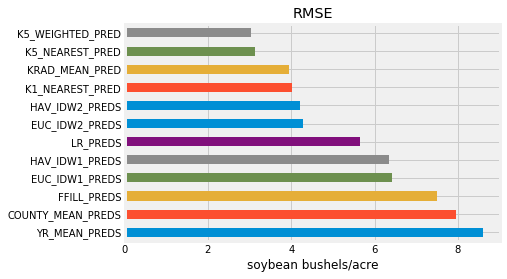

In [40]:
for m in ['MAE', 'RMSE']:  
    metric_df[m].sort_values(ascending=False).plot(kind="barh", title=col)
    plt.xlabel("{} bushels/acre".format(target_crop))
    plt.title(m)
    plt.show();

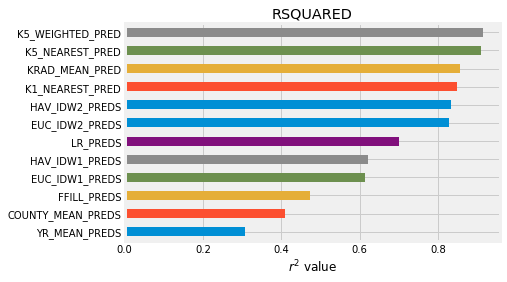

In [41]:
metric_df['RSQUARED'].sort_values().plot(kind="barh", title=col)
plt.xlabel("$r^2$ value")
plt.title('RSQUARED')
plt.show();

# Scatter Plots
### Comparing Predictions vs True Values for all methods

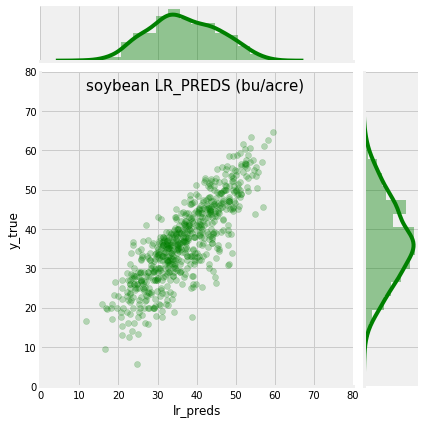

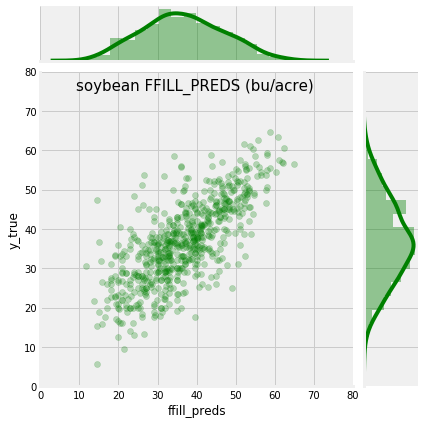

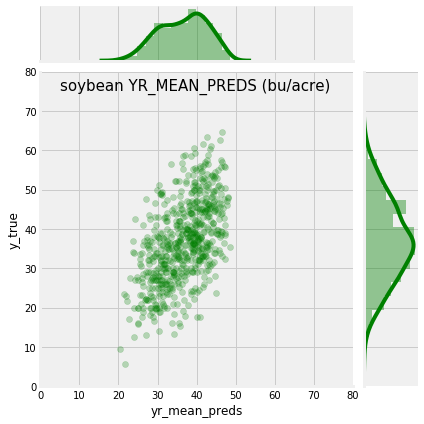

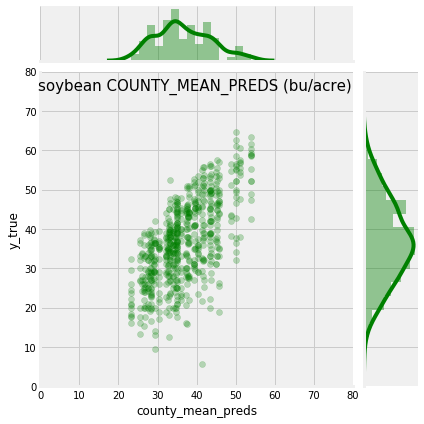

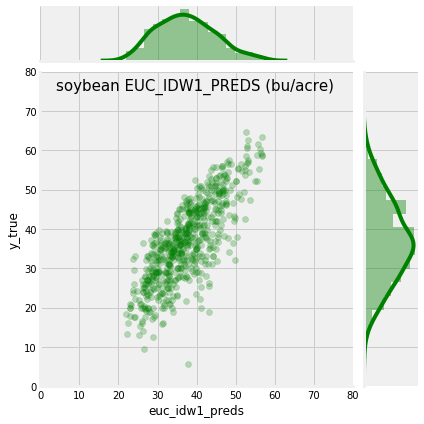

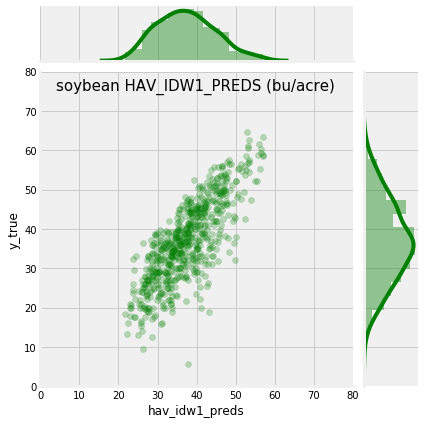

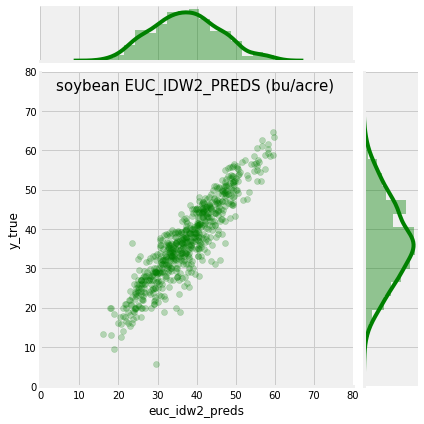

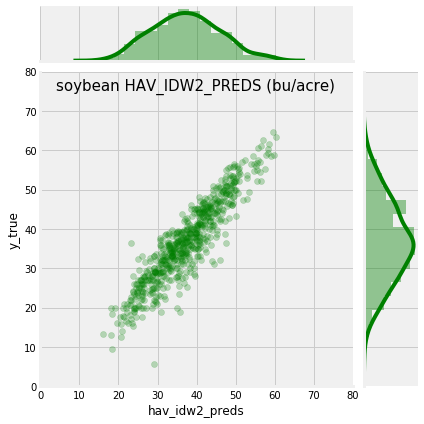

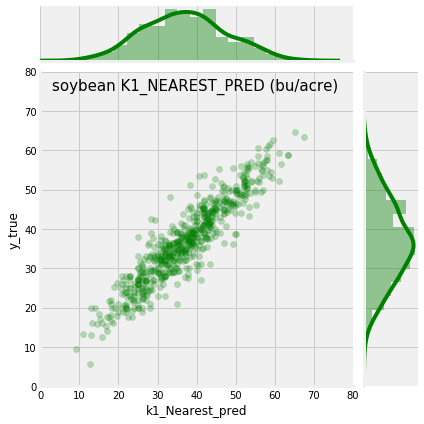

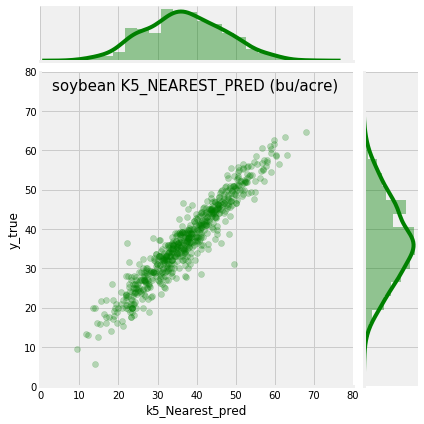

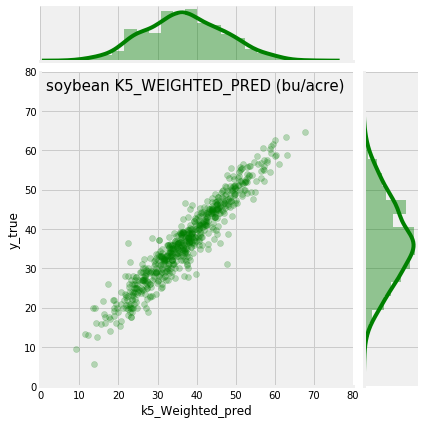

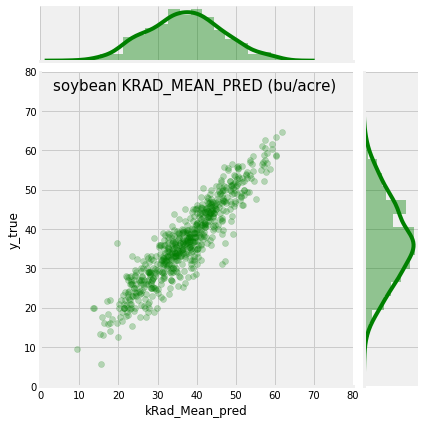

In [43]:
for col in pred_cols: 
    g = sns.JointGrid(x=predictions[col], y=predictions['y_true'], 
                      xlim=(0,80), ylim=(0,80))
    g = g.plot_joint(plt.scatter, color='g', alpha=0.25)
    g = g.plot_marginals(sns.distplot, color='g')
    plt.suptitle("{} {} (bu/acre)".format(target_crop, col.upper()), 
                 x=0.46, y=0.81, fontsize=15)
    plt.show();
    print()

___